In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [31]:
ncr=pd.read_excel('/home/hesham/NMG/8-25/new/NCR_8_25.xlsx')

In [32]:
pd.set_option('display.max_rows',999)
pd.set_option('display.max_columns',999)

In [33]:
ncr.head(2)

,م,شهر,تاريخ الرصد\nRecord Date,مصدر الحالة\nSource,100,Column1,الكود\nCode,Column2,النماذج المستخدمة\nForms,منطقة الحدث,المعدة / الأداه,الإدارة المتواجد بها الحالة,كود الشخص القائم بالتبليغ,إسم الشخص القائم بالتبليغ,محرر التقرير\nSHE. Editor,وصف حالة عدم التطابق\nDescription of non conformance,السبب\nCause,الوردية\nShift,درجة الخطورة\nDegree of Risk,Sent,الاجراء التصحيحي / الوقائي\nCorrective /Preventive Action,الإدارة المنفذة\nApplied by,تاريخ التنفيذ\nTarget Date,on progress,المتابعة\nFollow Up,المتابع\nFollowed by,تاريخ الإغلاق\nDate of Close,Closed On Time,في حالة توقــيع جـزاء عـلى الـعامل,Unnamed: 29,Unnamed: 30,ملاحظات \nNotes
0,1,2025-07-01,2025-07-07,قوائم الفحص,NaN,NaN,N/1/7/7,NaN,NaN,المبني الاداري,الداتا سنتر,الشؤون الادارية,NaN,احمد مرسي مرسي,محمود فضل الله,تكرارتسريب مياه من وحدة التكييف بغرفة الداتا س...,من المحتمل أن يكون ذلك نتيجة انسداد متكرر في خ...,NaN,عالى,OK,اتخاذ إجراءات عاجلة ودائمة لمعالجة السبب الجذر...,الشؤون الادارية,NaN,END,Closed,احمد مرسي مرسي,14/7/2025,NaN,NaN,NaN,NaN,NaN
1,2,2025-07-01,2025-07-07,قوائم الفحص,NaN,NaN,N/2/7/7,NaN,NaN,عنبر ويب2,ماكينة ويب 9,الويب,14982.0,احمد سعد طلبة,محمود فضل الله,قطع في خرطوم الهواء الخاص باستيكر ويب 9,عدم القيام بالصيانة الدورية بشكل منتظم,NaN,متوسط,OK,اداء الصيانة الدورية بشكل منتظم,الادارة الهندسية,NaN,END,Closed,محمد فؤاد خليل,2025-07-07 00:00:00,NaN,NaN,NaN,NaN,NaN


In [34]:
# حاول تحويل العمود إلى datetime
ncr['شهر'] = pd.to_datetime(ncr['شهر'], errors='coerce')

# تحقق مرة أخرى من النوع
print(ncr['شهر'].dtype)

datetime64[ns]


In [35]:
# الآن يمكنك استخدام .dt
august_cases = ncr[ncr['شهر'].dt.month == 8]
july_cases = ncr[ncr['شهر'].dt.month == 7]

print(f"يوليو: {july_cases.shape}")
print(f"أغسطس: {august_cases.shape}")

يوليو: (13, 32)
أغسطس: (12, 32)


In [36]:
# عدد الحالات في كل شهر
print(f"عدد حالات يوليو: {len(july_cases)}")
print(f"عدد حالات أغسطس: {len(august_cases)}")


عدد حالات يوليو: 13
عدد حالات أغسطس: 12


In [42]:
ncr_department = ncr.groupby(['الإدارة المتواجد بها الحالة', 'المتابعة\nFollow Up'])\
    ['المتابعة\nFollow Up'].count()\
    .unstack().fillna(0).astype(int)\
    .reset_index()

# حساب مجموع كل صف وإضافة عمود جديد
ncr_department['المجموع'] = ncr_department.sum(axis=1, numeric_only=True)

# ترتيب البيانات تنازلياً حسب المجموع
ncr_department = ncr_department.sort_values('المجموع', ascending=False).reset_index(drop=True)

ncr_department

المتابعة Follow Up,الإدارة المتواجد بها الحالة,Closed,Opened,المجموع
0,الويب,9,1,10
1,الادارة الهندسية,5,0,5
2,الشؤون الادارية,4,0,4
3,التجليد,2,0,2
4,الانتاج,1,0,1
5,IT,0,1,1
6,المخازن,1,0,1
7,طبع الشيت,1,0,1


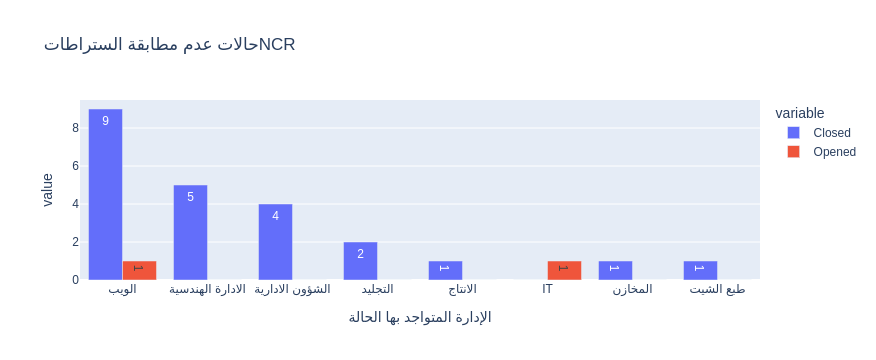

In [44]:
px.bar(data_frame=ncr_department,
       x='الإدارة المتواجد بها الحالة',
       y=['Closed', 'Opened'],
       barmode='group',text_auto=True,
       title='حالات عدم مطابقة الستراطاتNCR')

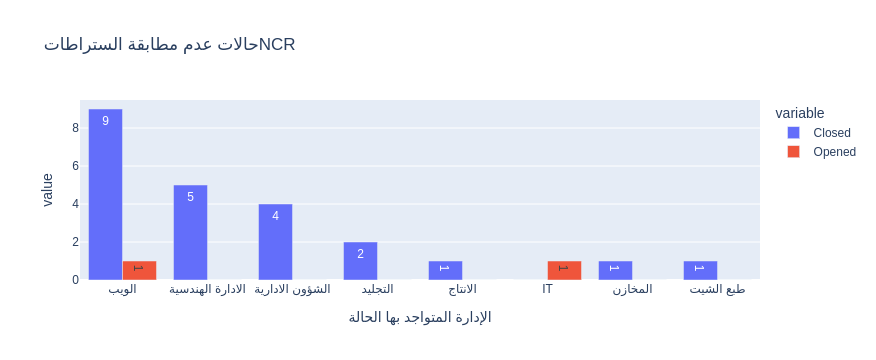

In [51]:
px.bar(data_frame=ncr_department,
       x='الإدارة المتواجد بها الحالة',
       y=['Closed', 'Opened'],
       barmode='group',text_auto=True,
       title='حالات عدم مطابقة الستراطاتNCR')

In [48]:
ncr_hse = ncr.groupby(['إسم الشخص القائم بالتبليغ', 'المتابعة\nFollow Up'])['المتابعة\nFollow Up']\
    .count().unstack().fillna(0).astype(int).reset_index()

# إضافة عمود للمجموع
ncr_hse['المجموع'] = ncr_hse.sum(axis=1, numeric_only=True)

# إضافة عمود للترتيب من الأكثر للأقل
ncr_hse['الترتيب'] = ncr_hse['المجموع'].rank(ascending=False, method='dense').astype(int)

# ترتيب البيانات تنازلياً حسب المجموع
ncr_hse = ncr_hse.sort_values('المجموع', ascending=False).reset_index(drop=True)

ncr_hse

المتابعة Follow Up,إسم الشخص القائم بالتبليغ,Closed,Opened,المجموع,الترتيب
0,احمد مرسي مرسي,14,0,14,1
1,محمد موسى اسماعيل,2,1,3,2
2,علي صلاح علي,2,1,3,2
3,احمد سعد طلبة,2,0,2,3
4,علاء عنتر محمد,1,0,1,4
5,كريم مجدي احمد,1,0,1,4
6,محمد محمود عبدالعال,1,0,1,4


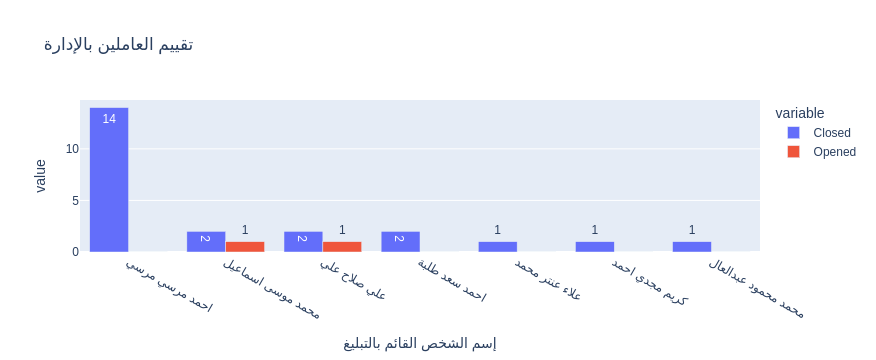

In [49]:
px.bar(data_frame=ncr_hse,x='إسم الشخص القائم بالتبليغ',y=['Closed', 'Opened'],
       barmode='group',text_auto=True,title='تقييم العاملين باﻹدارة')

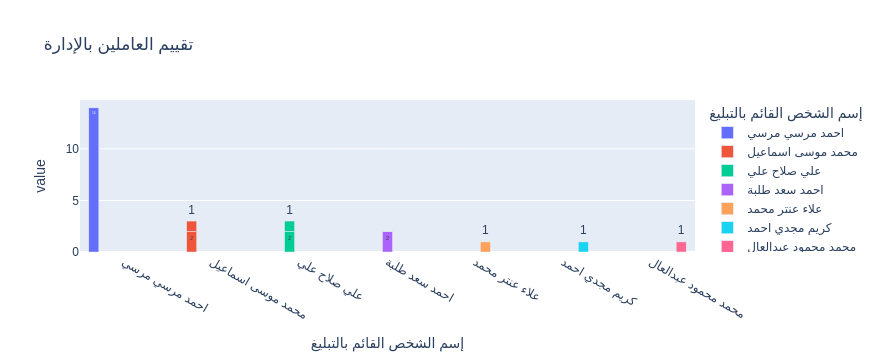

In [50]:
px.bar(data_frame=ncr_hse,x='إسم الشخص القائم بالتبليغ',y=['Closed', 'Opened'], barmode='group',\
       text_auto=True,color='إسم الشخص القائم بالتبليغ',\
       title='تقييم العاملين باﻹدارة')

In [53]:
ncr_department7 = july_cases.groupby(['الإدارة المتواجد بها الحالة', 'المتابعة\nFollow Up'])\
    ['المتابعة\nFollow Up'].count()\
    .unstack().fillna(0).astype(int)\
    .reset_index()

# حساب مجموع كل صف وإضافة عمود جديد
ncr_department7['المجموع'] = ncr_department7.sum(axis=1, numeric_only=True)

# ترتيب البيانات تنازلياً حسب المجموع
ncr_department7 = ncr_department7.sort_values('المجموع', ascending=False).reset_index(drop=True)

ncr_department7

المتابعة Follow Up,الإدارة المتواجد بها الحالة,Closed,Opened,المجموع
0,الويب,7,0,7
1,الشؤون الادارية,2,0,2
2,الادارة الهندسية,1,0,1
3,IT,0,1,1
4,الانتاج,1,0,1
5,طبع الشيت,1,0,1


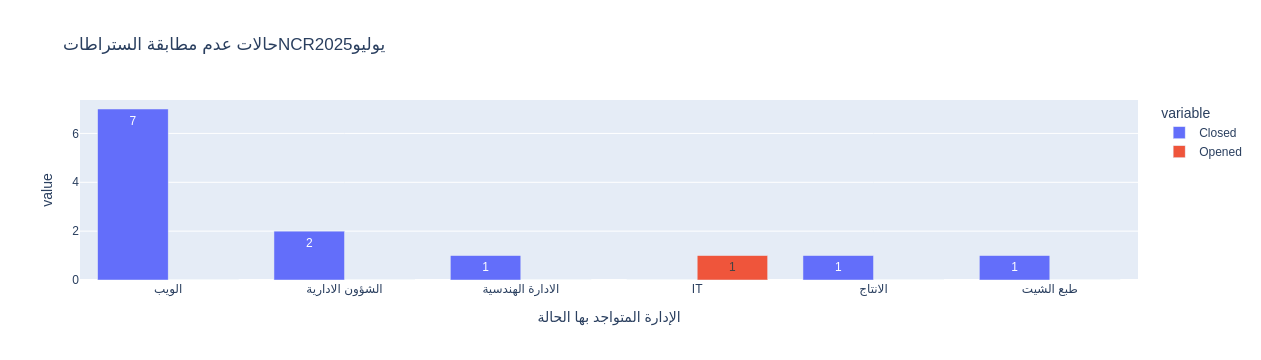

In [54]:
px.bar(data_frame=ncr_department7,x='الإدارة المتواجد بها الحالة',y=['Closed', 'Opened'], barmode='group',text_auto=True,title='حالات عدم مطابقة الستراطاتNCRيوليو2025')

In [58]:
ncr_hse7 = july_cases.groupby(['إسم الشخص القائم بالتبليغ', 'المتابعة\nFollow Up'])['المتابعة\nFollow Up']\
    .count().unstack().fillna(0).astype(int).reset_index()

# إضافة عمود للمجموع
ncr_hse7['المجموع'] = ncr_hse7.sum(axis=1, numeric_only=True)

# إضافة عمود للترتيب من الأكثر للأقل
ncr_hse7['الترتيب'] = ncr_hse7['المجموع'].rank(ascending=False, method='dense').astype(int)

# ترتيب البيانات تنازلياً حسب المجموع
ncr_hse7 = ncr_hse7.sort_values('المجموع', ascending=False).reset_index(drop=True)

ncr_hse7

المتابعة Follow Up,إسم الشخص القائم بالتبليغ,Closed,Opened,المجموع,الترتيب
0,احمد مرسي مرسي,9,0,9,1
1,محمد موسى اسماعيل,1,1,2,2
2,احمد سعد طلبة,1,0,1,3
3,علي صلاح علي,1,0,1,3


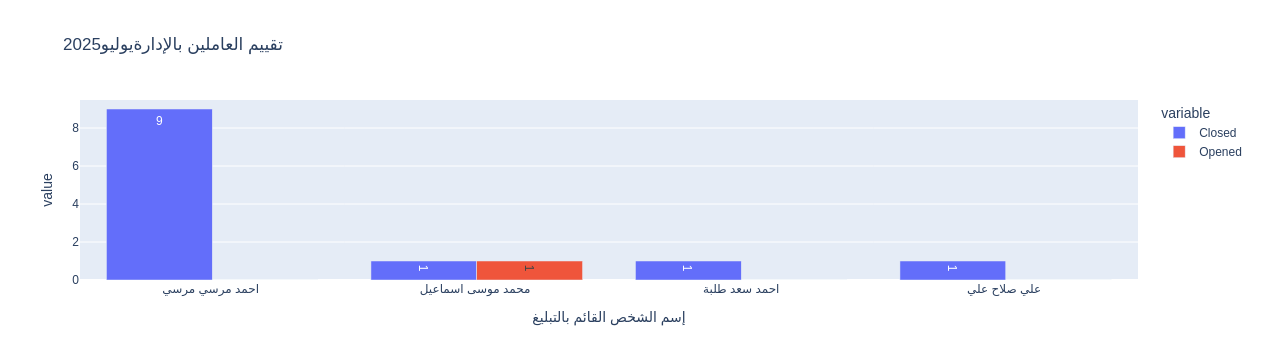

In [59]:
px.bar(data_frame=ncr_hse7,x='إسم الشخص القائم بالتبليغ',y=['Closed', 'Opened'], barmode='group',text_auto=True,title=' تقييم العاملين باﻹدارةيوليو2025')

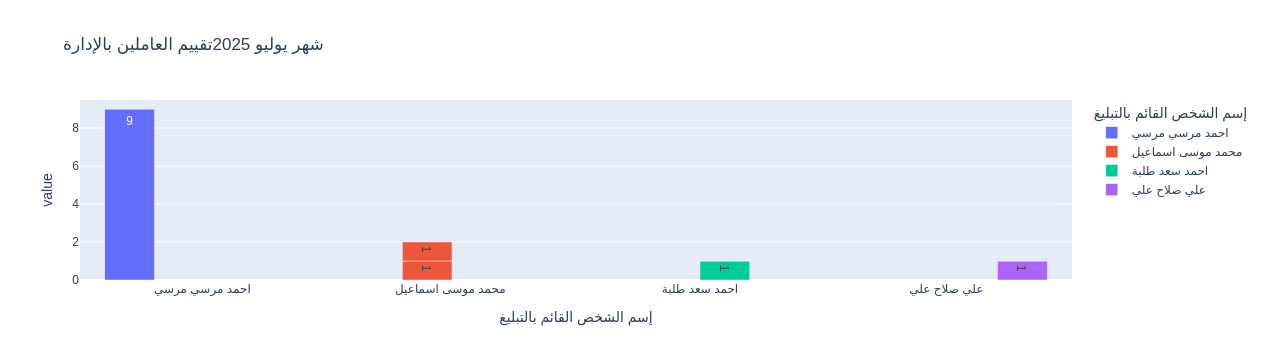

In [60]:
px.bar(data_frame=ncr_hse7,x='إسم الشخص القائم بالتبليغ',y=['Closed', 'Opened'], barmode='group',\
       text_auto=True,color='إسم الشخص القائم بالتبليغ',\
       title='شهر يوليو 2025تقييم العاملين باﻹدارة')

In [61]:
ncr_department8 = august_cases.groupby(['الإدارة المتواجد بها الحالة', 'المتابعة\nFollow Up'])\
    ['المتابعة\nFollow Up'].count()\
    .unstack().fillna(0).astype(int)\
    .reset_index()

# حساب مجموع كل صف وإضافة عمود جديد
ncr_department8['المجموع'] = ncr_department8.sum(axis=1, numeric_only=True)

# ترتيب البيانات تنازلياً حسب المجموع
ncr_department8 = ncr_department8.sort_values('المجموع', ascending=False).reset_index(drop=True)

ncr_department8

المتابعة Follow Up,الإدارة المتواجد بها الحالة,Closed,Opened,المجموع
0,الادارة الهندسية,4,0,4
1,الويب,2,1,3
2,التجليد,2,0,2
3,الشؤون الادارية,2,0,2
4,المخازن,1,0,1


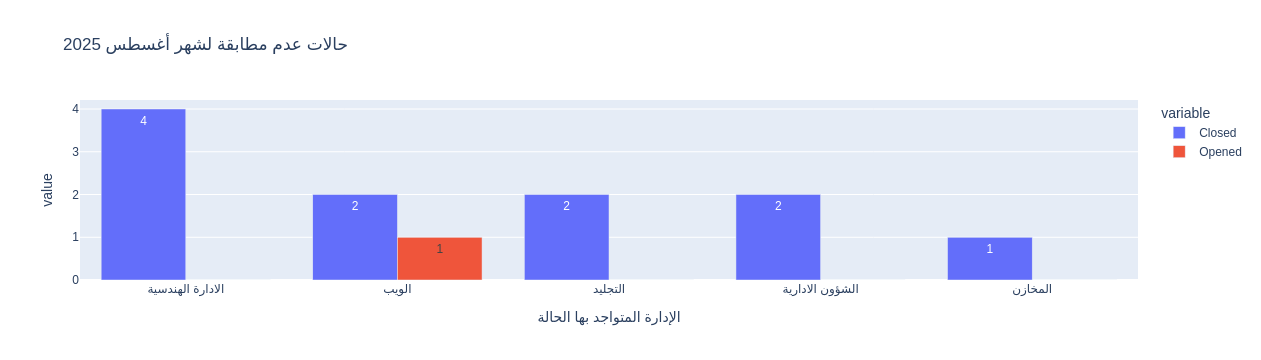

In [62]:
px.bar(data_frame=ncr_department8,x='الإدارة المتواجد بها الحالة',y=['Closed', 'Opened'], barmode='group',text_auto=True,title='حالات عدم مطابقة لشهر أغسطس 2025')

In [64]:
ncr_hse8 = august_cases.groupby(['إسم الشخص القائم بالتبليغ', 'المتابعة\nFollow Up'])['المتابعة\nFollow Up']\
    .count().unstack().fillna(0).astype(int).reset_index()

# إضافة عمود للمجموع
ncr_hse8['المجموع'] = ncr_hse8.sum(axis=1, numeric_only=True)

# إضافة عمود للترتيب من الأكثر للأقل
ncr_hse8['الترتيب'] = ncr_hse8['المجموع'].rank(ascending=False, method='dense').astype(int)

# ترتيب البيانات تنازلياً حسب المجموع
ncr_hse8 = ncr_hse8.sort_values('المجموع', ascending=False).reset_index(drop=True)

ncr_hse8

المتابعة Follow Up,إسم الشخص القائم بالتبليغ,Closed,Opened,المجموع,الترتيب
0,احمد مرسي مرسي,5,0,5,1
1,علي صلاح علي,1,1,2,2
2,احمد سعد طلبة,1,0,1,3
3,علاء عنتر محمد,1,0,1,3
4,كريم مجدي احمد,1,0,1,3
5,محمد محمود عبدالعال,1,0,1,3
6,محمد موسى اسماعيل,1,0,1,3


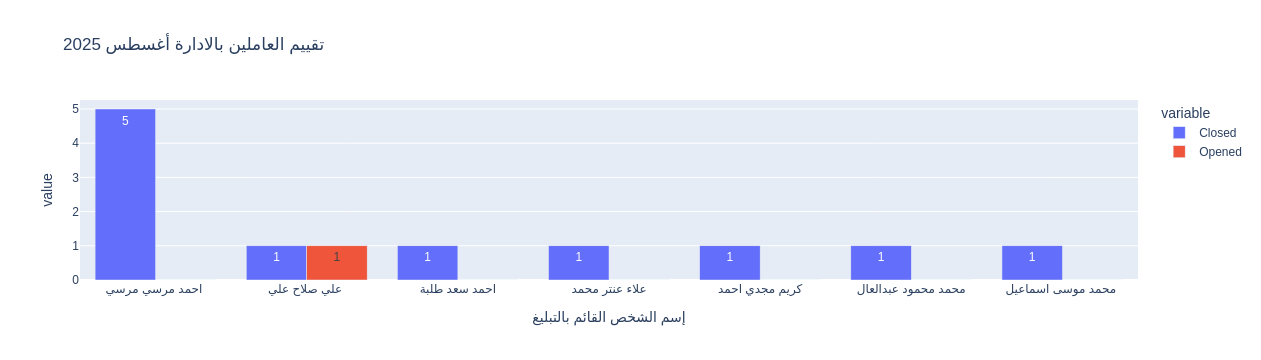

In [65]:
px.bar(data_frame=ncr_hse8,x='إسم الشخص القائم بالتبليغ',y=['Closed', 'Opened'], barmode='group',text_auto=True,title="تقييم العاملين بالادارة أغسطس 2025")

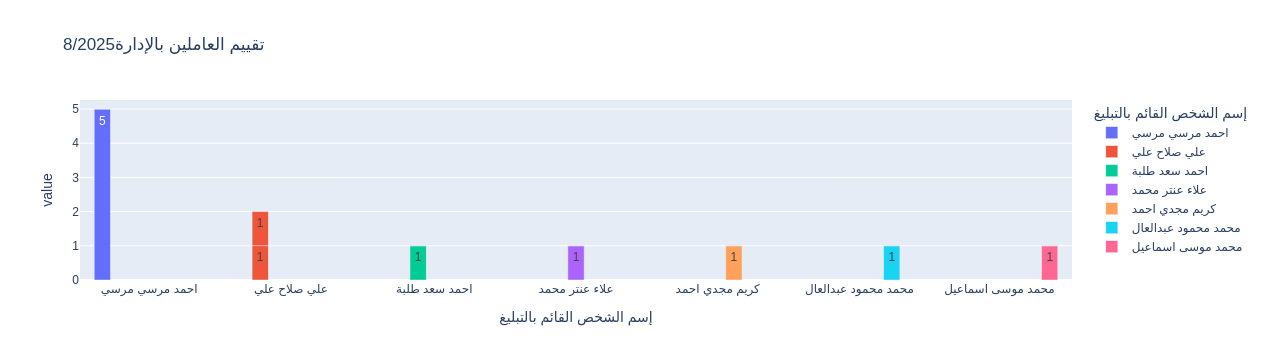

In [66]:
px.bar(data_frame=ncr_hse8,x='إسم الشخص القائم بالتبليغ',y=['Closed', 'Opened'], barmode='group',\
       text_auto=True,color='إسم الشخص القائم بالتبليغ',\
       title='8/2025تقييم العاملين باﻹدارة')